# Analisis de sentimiento

#Objetivo
#Construir una red neuronal profunda para clasificar reseñas de películas en positivas o negativas utilizando el dataset IMDB Movie Reviews.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
import tensorflow_datasets as tfds


In [ ]:
train_data , ds_info = tfds.load('imdb_reviews',split='train',as_supervised=True,with_info=True,shuffle_files=True)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/3 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.VXZ7C6_1.0.0/imdb_reviews-train.tfrecor…

Generating test examples...:   0%|          | 0/25000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.VXZ7C6_1.0.0/imdb_reviews-test.tfrecord…

Generating unsupervised examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/imdb_reviews/plain_text/incomplete.VXZ7C6_1.0.0/imdb_reviews-unsupervised.…

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/plain_text/1.0.0. Subsequent calls will reuse this data.


#Convertimos a un padaset para trabajar con pd


In [ ]:
images = []
labels = []

In [ ]:
for image, label in train_data.take(5000):
    decoded_image = image.numpy().decode('utf-8')
    images.append(decoded_image)
    labels.append(label.numpy())

In [ ]:
df = pd.DataFrame({'review': images, 'sentiment': labels})

In [ ]:
df.head()

,review,sentiment
0,This was an absolutely terrible movie. Don't b...,0
1,"I have been known to fall asleep during films,...",0
2,Mann photographs the Alberta Rocky Mountains i...,0
3,This is the kind of film for a snowy Sunday af...,1
4,"As others have mentioned, all the women that g...",1


#BackUp

In [ ]:
df_copy = df.copy()

Natural Language Toolkit, o más comúnmente NLTK, es un conjunto de bibliotecas y programas para el procesamiento simbólico y estadístico del lenguaje natural para inglés escrito en el lenguaje de programación Python. Admite funcionalidades de clasificación, tokenización, derivación, etiquetado, análisis y razonamiento semántico.

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

#Importamos BeautifulSoup4 para eliminar los elementos html del texto

In [ ]:
!pip install BeautifulSoup4
from bs4 import BeautifulSoup
import re

In [ ]:
def clean_text(text):

  soup = BeautifulSoup(text, "html.parser")
  text = soup.get_text()

  text = text.lower()

  text = re.sub(r"[^a-zA-Z0-9]", " ", text)

  tokens = word_tokenize(text)

  tokens = [word for word in tokens if word not in stopwords.words("english")]

  return " ".join(tokens)


In [ ]:
df['review'] = df['review'].apply(clean_text)

In [ ]:
df.head()

,review,sentiment
0,absolutely terrible movie lured christopher wa...,0
1,known fall asleep films usually due combinatio...,0
2,mann photographs alberta rocky mountains super...,0
3,kind film snowy sunday afternoon rest world go...,1
4,others mentioned women go nude film mostly abs...,1


Necesitamos convertir las palabras o frases a vectores numéricos.

Utilizare el Bag Of Words (BoW): Este enfoque convierte el texto en una matriz de frecuencias de palabras, donde cada palabra del vocabulario es una columna, y el valor es la cantidad de veces que aparece la palabra en el documento.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

In [ ]:
print(vectorizer.get_feature_names_out())
print(X.toarray())


['00' '000' '001' ... 'zz' 'zzzzzzzzzzzzpop' 'zzzzzzzzzzzzz']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from sklearn.model_selection import train_test_split

In [ ]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=16, input_length=100),
    GlobalAveragePooling1D(),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d             │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.25, random_state=42)

In [ ]:
X_train = X_train.toarray()
X_test = X_test.toarray()

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 14s 77ms/step - accuracy: 0.5094 - loss: 0.6955 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.4949 - loss: 0.6932 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4925 - loss: 0.6933 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5039 - loss: 0.6931 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5191 - loss: 0.6928 - val_accuracy: 0.5032 - val_loss: 0.6932
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.5069 - loss: 0.6931 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5022 - loss: 0.6932 - val_accuracy: 0.5032 - val_loss: 0.6931
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.5047 - loss: 0.6931 - val_ac

Text(0.5, 0, 'val_loss')

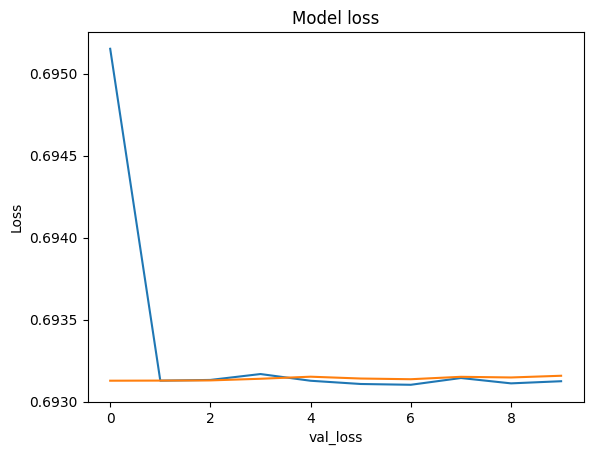

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')


Text(0.5, 0, 'val_accuracy')

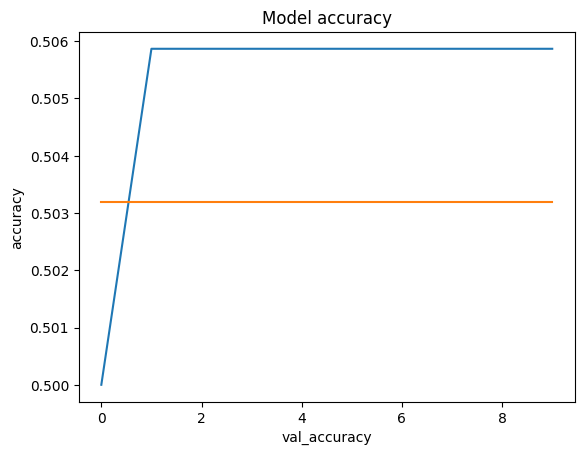

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')


In [ ]:
loss , accuracy = model.evaluate(X_test,y_test)
print(f"Pérdida en el conjunto de prueba: {loss}")
print(f"Precisión en el conjunto de prueba: {accuracy}")

40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5249 - loss: 0.6925
Pérdida en el conjunto de prueba: 0.6931571364402771
Precisión en el conjunto de prueba: 0.5031999945640564


In [ ]:
model_2 = Sequential()
model_2.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_2.add(Dense(16, activation='relu'))
model_2.add(Dense(1, activation='sigmoid'))

model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history_2 = model_2.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 5s 29ms/step - accuracy: 0.7156 - loss: 0.5913 - val_accuracy: 0.8432 - val_loss: 0.3927
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9668 - loss: 0.1233 - val_accuracy: 0.8560 - val_loss: 0.3960
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9992 - loss: 0.0275 - val_accuracy: 0.8504 - val_loss: 0.4639
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9993 - loss: 0.0075 - val_accuracy: 0.8520 - val_loss: 0.5192
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.8512 - val_loss: 0.5625
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8520 - val_loss: 0.6060
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 8.4268e-04 - val_accuracy: 0.8504 - val_loss: 0.6422
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 1.0000 - loss: 4.9131e-04 - val_a

Text(0.5, 0, 'val_loss')

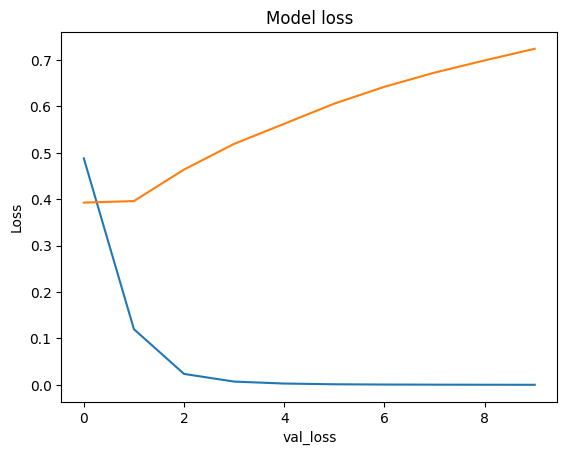

In [ ]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('val_loss')

Text(0.5, 0, 'val_accuracy')

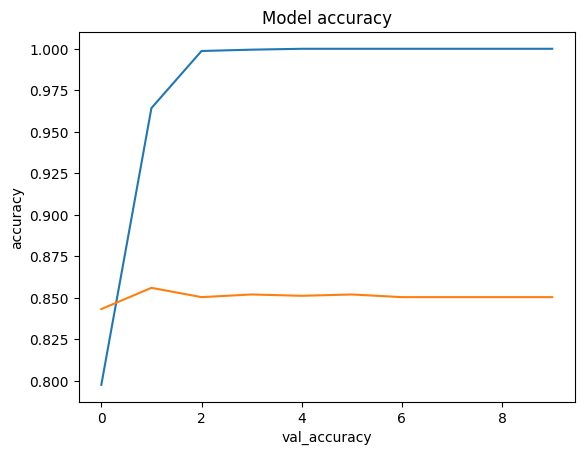

In [ ]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('val_accuracy')

In [ ]:
y_pred = model_2.predict(X_test)

40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


Hice 2 modelos para ver el resultado uno del otro siendo el 2 el que mejor resultado me dio y abajo estan las pruebas. Pense que por las perdidas y acurracy el modelo se sobreajusto pero esta prediciendo correctamente.

In [ ]:
# Probando el modelo con reviews de imdb (puede escoger el texto de un review o escribirlo en ingles y el modelo va a predecir)
# En este caso tome una review de the joker 2 negativa y fui provando con otras y toda fueron 100% acertadas
text = input("Ingrese el texto de una review: ")
new_review = text

# Preprocesar
new_review = clean_text(new_review)

# Convertir la reseña a una matriz de vectores
new_review_vector = vectorizer.transform([new_review])

# Convertir la matriz dispersa a un array
new_review_vector = new_review_vector.toarray()


# Realizar la predicción utilizando el modelo entrenado
prediction = model_2.predict(new_review_vector)

# Interpretar la predicción
if prediction[0][0] > 0.5:
  print("La reseña es positiva.")
else:
  print("La reseña es negativa.")

print(prediction)


Ingrese el texto de una review: I wish this movie was never made. It kinda started interesting, with Arthur in the prison, but after less than an hour it was obvious that there was no story at all and Lady Gaga was basically acting herself. At one point it felt like I was watching a super long Lady Gaga music video. I felt disappointed and angry when I left the theatre. Waste of my time and money.  Two stars because of Joaquin Phoenix, who is an amazing actor and did his best, even though the script was horrible. I wonder if he thought making the film was a good idea, after reading the script and knowing it was going to be a musical.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
La reseña es negativa.
[[1.20149525e-05]]
